<a href="https://colab.research.google.com/github/captmmari/Decsriptive-analysis-Independent-project/blob/main/Simon_Mmari_Independent_Project_Week04_Core.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.1.0 Defining the question.

Average usage of Blue cars from sampled postal codes

# 1.1.1 Metrics for success

In this analysis I will be able to;
1. Find and deal with outliers, anomalies, and missing data within the dataset.
2. Plot appropriate univariate and bivariate summaries recording our observations.
3. Implement the solution by performing hypothesis testing.
4. Challenge our solution by providing insights on how we can make improvements.

From the analysis done in google Collaboratory, we have proof that we will not reject the null, this is because, for every day, the answers are different but fair.
With this, we will be able to use a T-test to be able to find the mean of the two values picked.


# 1.1.2 Understanding the context

I will seek to understand Bluecars usage by solving for another research question.
I will work as a Data Scientist for the Autolib electric car-sharing service company to investigate a claim about the blue cars from the provided Autolib dataset.
To do this, I need to identify some areas and periods of interest via sampling stating the reason to the choice of method,Then perform hypothesis testing with regards to the claim that we will have made. I wil be using this claim,(Is the procedure of taking a bluecar from the first postal code the same as another randomly picked postal code)
The selected periods of interest be either weekdays or weekends as I seem to not work with a mixture since it is big and it is not necessary to use both at in a mixture
We can also consider postal codes as some of the areas of interest.


# 1.1 Importing the libraries.

In [ ]:
# Importing libraries to be used
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1.2 loading the dataset.

In [ ]:
# Loading Autolib Dataset
df = pd.read_csv('/content/autolib_daily_events_postal_code (1).csv')
df

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0


In [ ]:
# Top of the dataset
df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [ ]:
# Bottom of the dataset
df.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [ ]:
# Checking Dataset shape
df.shape

(16085, 13)

In [ ]:
# Checking statistical Dataset description
df.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


In [ ]:
# check the columns that are in our dataset
df.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [ ]:
#  Checking whether each column has an appropriate datatypes
df.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

In [ ]:
# check for unique values in our autolib dataset
df.nunique()

Postal code               104
date                      156
n_daily_data_points        23
dayOfWeek                   7
day_type                    2
BlueCars_taken_sum        932
BlueCars_returned_sum     929
Utilib_taken_sum           48
Utilib_returned_sum        49
Utilib_14_taken_sum        92
Utilib_14_returned_sum     94
Slots_freed_sum           297
Slots_taken_sum           301
dtype: int64

In [ ]:
# Checkinf for a specific column
df['day_type'].unique()

array(['weekday', 'weekend'], dtype=object)

In [ ]:
df['dayOfWeek'].unique()

array([0, 1, 2, 3, 4, 5, 6])

# 1.3 Cleaning th Dataset.


In [ ]:
# Checking for null values
df.isnull().sum()

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

In [ ]:
# Checking for duplicates
df.duplicated().sum()

0

In [ ]:
# Rename and correcting column names
df.rename({'n_daily_data_points' : 'Daily_points', 'BlueCars_taken_sum' : 'Bluecars_taken', 'BlueCars_returned_sum' : 'Bluecars_returned', 'Utilib_taken_sum' : 'Utilib_returned_sum', 'Utilib_14_taken_sum' : 'Utilib14_taken', 'Utilib_14_returned_sum' : 'Utilib14_returned', 'Slots_taken_sum' : 'Slotstaken', 'Slots_freed_sum' : 'Slotsfreed'}, axis=1, inplace=True)
df.head()

,Postal code,date,Daily_points,dayOfWeek,day_type,Bluecars_taken,Bluecars_returned,Utilib_returned_sum,Utilib_returned_sum,Utilib14_taken,Utilib14_returned,Slotsfreed,Slotstaken
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


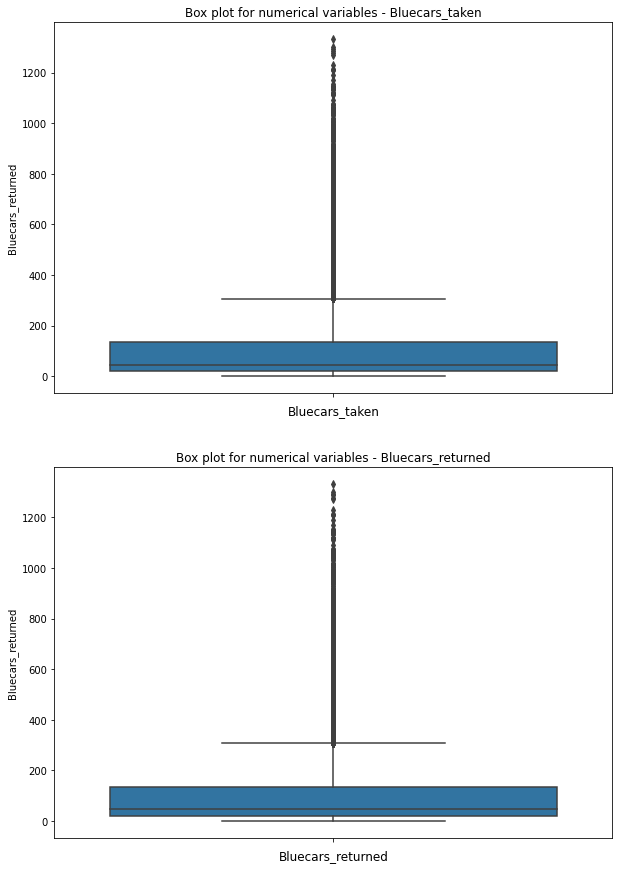

In [ ]:

col_names= ['Bluecars_taken','Bluecars_returned',]

fig, ax = plt.subplots(len(col_names), figsize=(10,15))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=df['Bluecars_returned'], ax=ax[i])
    ax[i].set_title('Box plot for numerical variables - {}'.format(col_val), fontsize=12)
    ax[i].set_xlabel(col_val, fontsize=12)

plt.show()

In [ ]:
# Dropping unnecessary columns
df1 = df.drop('date', axis = 1)
df1.drop
df1

,Postal code,Daily_points,dayOfWeek,day_type,Bluecars_taken,Bluecars_returned,Utilib_returned_sum,Utilib_returned_sum,Utilib14_taken,Utilib14_returned,Slotsfreed,Slotstaken
0,75001,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1440,4,weekday,114,117,3,3,6,6,18,20
...,...,...,...,...,...,...,...,...,...,...,...,...
16080,95880,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,1440,0,weekday,11,14,3,5,2,2,0,0


In [ ]:
# Converting the day of week from from numericals to strings for plotting
# Uning the mapping function
# 

df1['dayOfWeek'] = df1.dayOfWeek.map({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday'})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
# Calling out Cleaned Dataset
df1.head()

,Postal code,Daily_points,dayOfWeek,day_type,Bluecars_taken,Bluecars_returned,Utilib_returned_sum,Utilib_returned_sum,Utilib14_taken,Utilib14_returned,Slotsfreed,Slotstaken
0,75001,1440,Monday,weekday,110,103,3,2,10,9,22,20
1,75001,1438,Tuesday,weekday,98,94,1,1,8,8,23,22
2,75001,1439,Wednesday,weekday,138,139,0,0,2,2,27,27
3,75001,1320,Thursday,weekday,104,104,2,2,9,8,25,21
4,75001,1440,Friday,weekday,114,117,3,3,6,6,18,20


# 1.4 Univariate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


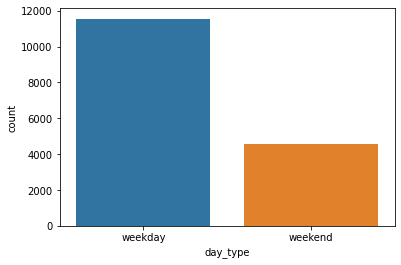

In [ ]:
# Plotting the count on different day types info
sns.countplot(df1['day_type'])

In [ ]:
# Modal day date
df1['dayOfWeek'].mode()

0    Monday
dtype: object

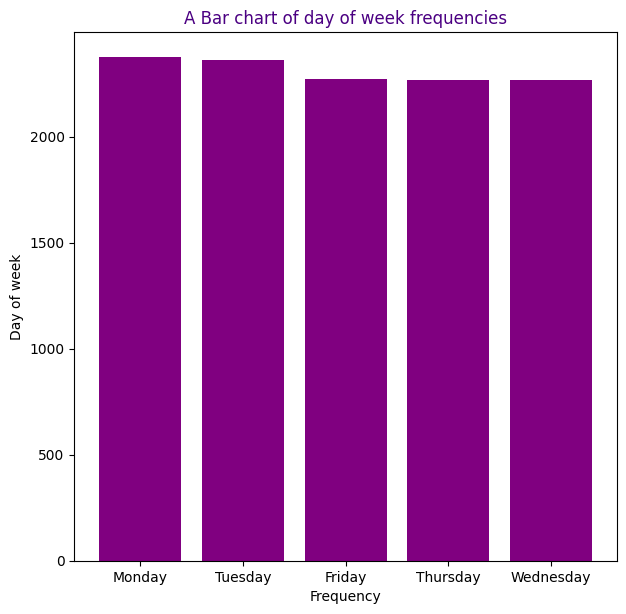

In [ ]:
# Barc chart representing day of week frequencies.
day = df1.dayOfWeek.value_counts()
day


sizes= day.index
sizes


data = day.values
data

plt.figure(figsize = (7,7), dpi = 100)
plt.bar(sizes, data, color = 'purple')
plt.ylabel("Day of week")
plt.xlabel('Frequency')
plt.title("A Bar chart of day of week frequencies", color = 'indigo')
plt.show()

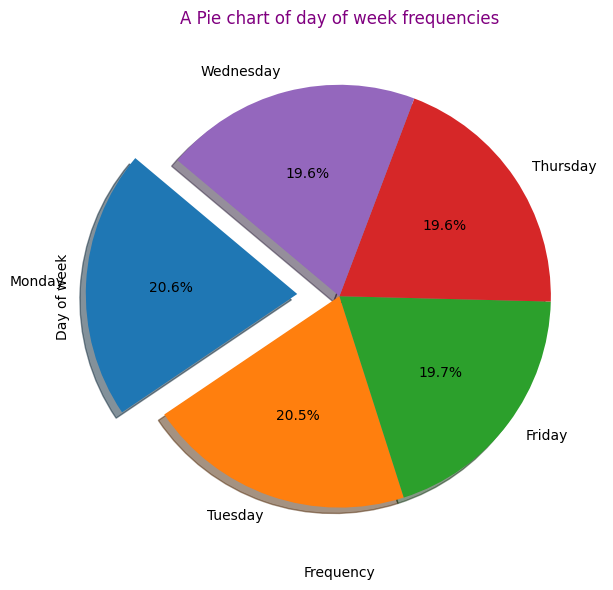

In [ ]:
# Pie chart of each day activity
day2 = df1.dayOfWeek.value_counts()
day2


sizes2= day.index
sizes2


data2 = day.values
data2



plt.figure(figsize = (7,7), dpi = 100)
plt.pie(data2, labels = sizes2, autopct = '%1.1f%%', shadow = True, explode = (0.2,0,0,0,0), startangle = 140)
plt.ylabel("Day of week")
plt.xlabel('Frequency')
plt.title("A Pie chart of day of week frequencies", color = 'purple')
plt.show()


In [ ]:
# Most appeared Day type in the dataset
df['day_type'].mode()

0    weekday
dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


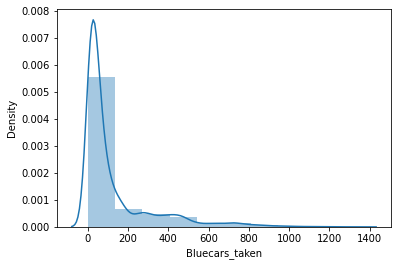

In [58]:
# Ditribution plot for respondent age
sns.distplot(df1['Bluecars_taken'], bins=10)

In [ ]:
# Frequency table showing sum of bluecars returned by day of week in ascending order.

df1.groupby('dayOfWeek')['Bluecars_returned'].sum().sort_values()



# Friday was when most blue cars were returned.
# while Tuesday was when the least number of blue cars were returned.

dayOfWeek
Tuesday      260470
Wednesday    260673
Thursday     262961
Monday       264808
Friday       286029
Name: Bluecars_returned, dtype: int64

In [ ]:
# Frequency table showing sum of bluecars returned by day of week in ascending order.

df1.groupby('dayOfWeek')['Bluecars_taken'].sum().sort_values()



# Friday was when most blue cars were taken.
# while Wednesday was when the least number of blue cars were taken.

dayOfWeek
Wednesday    261849
Tuesday      261940
Thursday     263207
Monday       263893
Friday       288546
Name: Bluecars_taken, dtype: int64

In [ ]:
df1['dayOfWeek'].describe()

count      11544
unique         5
top       Monday
freq        2374
Name: dayOfWeek, dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


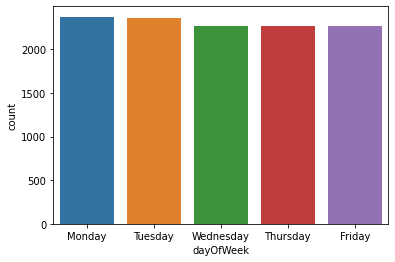

In [ ]:
# Plotting the count on each day information
sns.countplot(df1['dayOfWeek'])


In [ ]:
# Modal day of week of operation
df1['day_type'].mode()

0    weekday
dtype: object

In [ ]:
# Checking of type of Day mostly active
df1['day_type'].value_counts()

weekday    11544
weekend     4541
Name: day_type, dtype: int64

# 1.5 Bivariate Analysis


In [ ]:
# Mean number of Bluecars Taken
df1['Bluecars_taken'].mean()

125.92695057506994

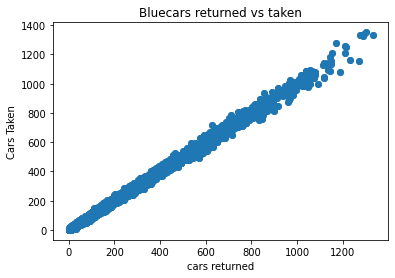

In [ ]:
# Scatter plot of Bluecars taken vs returned
df1.plot(x = 'Bluecars_returned', y = 'Bluecars_taken', kind='scatter')
plt.scatter(df1["Bluecars_returned"] , df1["Bluecars_taken"])
sns.regplot(x = df1["Bluecars_returned"], y = df1["Bluecars_taken"], fit_reg=False)
plt.title('Bluecars returned vs taken')
plt.xlabel('cars returned')
plt.ylabel('Cars Taken')
plt.show()

In [57]:
# Checking how our varibales are corelated using a matrix
corrMatrix = df1.corr()
corrMatrix

,Postal code,Daily_points,Bluecars_taken,Bluecars_returned,Utilib_returned_sum,Utilib_returned_sum,Utilib14_taken,Utilib14_returned,Slotsfreed,Slotstaken
Postal code,1.000000,0.000432,-0.698020,-0.697519,-0.625521,-0.624786,-0.656744,-0.656516,-0.749528,-0.749157
Daily_points,0.000432,1.000000,0.029411,0.030063,0.022669,0.023322,0.025738,0.026351,0.020873,0.021169
Bluecars_taken,-0.698020,0.029411,1.000000,0.998660,0.893833,0.892850,0.940946,0.940757,0.948575,0.947996
Bluecars_returned,-0.697519,0.030063,0.998660,1.000000,0.893613,0.893268,0.940542,0.941117,0.948258,0.948771
Utilib_returned_sum,-0.625521,0.022669,0.893833,0.893613,1.000000,0.981982,0.847519,0.846304,0.853760,0.853049
Utilib_returned_sum,-0.624786,0.023322,0.892850,0.893268,0.981982,1.000000,0.845645,0.845306,0.852939,0.852936
Utilib14_taken,-0.656744,0.025738,0.940946,0.940542,0.847519,0.845645,1.000000,0.992062,0.899232,0.898719
Utilib14_returned,-0.656516,0.026351,0.940757,0.941117,0.846304,0.845306,0.992062,1.000000,0.899442,0.899777
Slotsfreed,-0.749528,0.020873,0.948575,0.948258,0.853760,0.852939,0.899232,0.899442,1.000000,0.999221
Slotstaken,-0.749157,0.021169,0.947996,0.948771,0.853049,0.852936,0.898719,0.899777,0.999221,1.000000


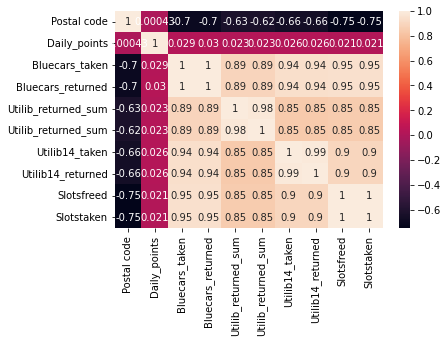

In [62]:
# investigating the correlation between vari ables

corelation = df1.corr()
# using a heatmap to display the results
sns.heatmap(corelation,xticklabels = corelation.columns, yticklabels = corelation.columns, annot=True)

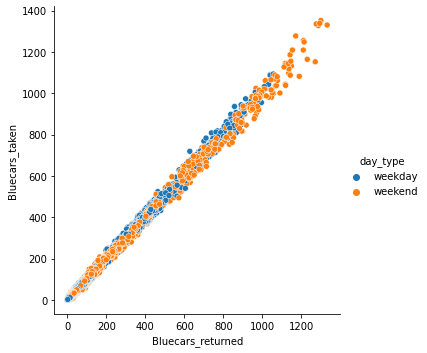

In [70]:
# Plotting Realational Plots
sns.relplot( x = 'Bluecars_returned', y = 'Bluecars_taken', hue = 'day_type',data = df1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


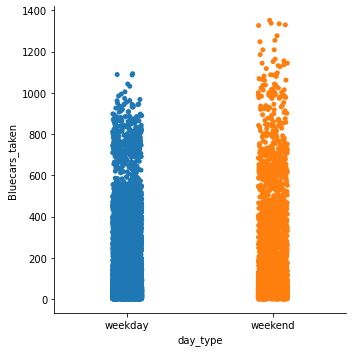

In [69]:
# Plotting our categorical data of Bluecars taken during a week
sns.catplot('day_type', 'Bluecars_taken', data = df1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


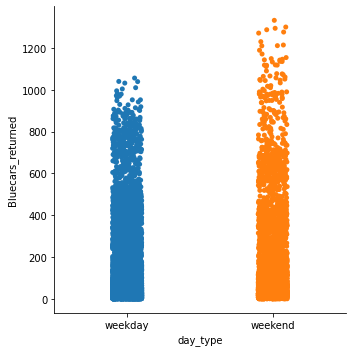

In [68]:
# Plotting our categorical data of Bluecars returned during a week
sns.catplot('day_type', 'Bluecars_returned', data = df1)

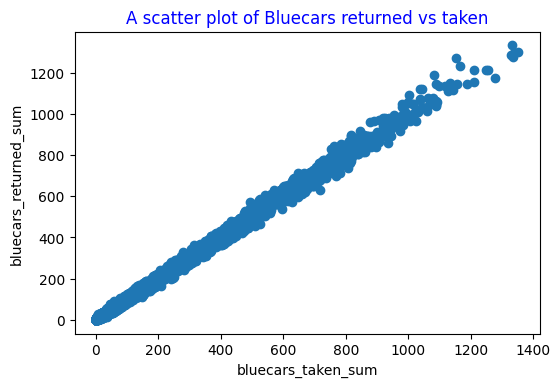

In [71]:
# Scatter plot showing the relationship between Bluecars taken and Returned
plt.figure(dpi = 100)
plt.scatter(df1['Bluecars_taken'], df1['Bluecars_returned'])
plt.title('A scatter plot of Bluecars returned vs taken', color = 'blue')
plt.xlabel('bluecars_taken_sum')
plt.ylabel('bluecars_returned_sum')
plt.show()


# **Below is a link to the google Document of the hypothesis testing.**


https://docs.google.com/document/d/1SaeqVRIRnCBooB1qof90iQGl2qlYNFODMTXCnT8utKU/edit#